# Convolutional Neural Network for Plant Disease Classification

### Related Material 

* [GitHub Repository](https://github.com/InPhyT/NeuralNetworksProject)
* [Report]()

### Train & Validation, Test Splitting 

This section has been run previously. The output dataset can be found in the input folder.

```python

src_dir = "../input/plantvillage/images" #r"../plant-pathology-2020-fgvc7/images"
train_val_dst_dir = "../working/train&val_images" #r"../plant-pathology-2020-fgvc7/train&val_images" #"../working/train&val_images"
test_dst_dir = "../working/test_images" #r"../plant-pathology-2020-fgvc7/test_images"  #"../working/test_images"

if not os.path.isdir(train_val_dst_dir):
    os.mkdir(train_val_dst_dir)
if not os.path.isdir(test_dst_dir):
    os.mkdir(test_dst_dir)


if len([f for f in os.listdir(test_dst_dir)]) == 0:
    all_images_names = os.listdir(src_dir)
    train_val_images = []
    test_images  = []
    for image in all_images_names:
        if "Train" in image:
            shutil.copy(src_dir+"/"+image,train_val_dst_dir)
        elif "Test" in image:
            shutil.copy(src_dir+"/"+image,test_dst_dir)
        else:
            print("error")

# Check for possible errors
total = len([f for f in  os.listdir(src_dir)])
train_val_total = len([f for f in  os.listdir(train_val_dst_dir)])
test_total = len([f for f in  os.listdir(test_dst_dir)])
print(total == train_val_total + test_total)
```
[ ] : True

### Modules

In [3]:
# INSTALL
# Latest version of tensorflow, which comes with useful image loading APIs
!pip install tf-nightly  # run only once per session

# IMPORT

## Magic commands for interactivity
%pylab inline                 

## Basic Utilities  
import sys                    # Enabler of operating system dependent functionality
import os                     # Provides access to some variables & functions for the interpreter
import shutil                 # Provides high-level operations on files and collections of files
from shutil import copyfile   # Import module we'll need to import our custom module
import math                   # Provides access to basic mathematical functions
import time                   # Provides various time-related functions
import glob                   # Pathnames management
from PIL import Image as pil_image
import itertools

## Data Manipulation & Analysis
import pandas as pd           # Methods to manipulate, filter, group, and transform data
import numpy as np            # Efficient storage and computation for multi-dimensional data arrays
from numpy import expand_dims

## Data Visualization 
import matplotlib             # Interface for creation of publication-quality plots and figures
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import seaborn as sns         # Matplotlib-based statistical data visualization interface 
### import plotly             # Interactive plotting library 
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

## Machine Learning 
### Scikit-Learn
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD # Principal component analysis (PCA); dimensionality reduction using truncated SVD.
### TensorFlow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, save_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import tensorflow.keras.layers as L
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam , RMSprop
### SMOTE
from imblearn.over_sampling import SMOTE # Class Balancing 

# Copy our file into the working directory (make sure it has .py suffix)
#copyfile(src = "../input/filter-visualization-modules/conv_filter_visualization.py", dst = "../working/conv_filter_visualization.py")
#copyfile(src = "../input/othermodules/model.py", dst = "../working/model.py")
#copyfile(src = "../input/othermodules/viz.py", dst = "../working/viz.py")
#copyfile(src = "../input/othermodules/utils.py", dst = "../working/utils.py")

# Import all functions 
#from conv_filter_visualization import *

     |████████████████████████████████| 316.4 MB 42 kB/s s eta 0:00:01�█████████▋                 | 144.5 MB 43.7 MB/s eta 0:00:04     |██████████████▉                 | 146.7 MB 43.7 MB/s eta 0:00:04     |████████████████▏               | 160.0 MB 43.7 MB/s eta 0:00:04     |████████████████▏               | 160.2 MB 43.7 MB/s eta 0:00:04
     |████████████████████████████████| 3.0 MB 35.7 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 33.9 MB/s eta 0:00:01
Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


### Data Exploration

In [4]:
# Here we get an insight of the datasets

kaggle = True
if kaggle:
    outdir = r"../working/"
    indir = r"../input/plantvillage/"
else:
    outdir = r"Q:/tooBigToDrive/plantsvillage/temp/"
    indir = r"Q:/tooBigToDrive/plantsvillage/"
    
test_dir = indir + "plantvillage_split_dataset/test_images"
train_labels_csv = pd.read_csv(indir+"plantvillage_split_dataset/train.csv")
print(train_labels_csv.head())
print("-------------------------------------")
example_submission_csv = pd.read_csv(indir+"plantvillage_split_dataset/sample_submission.csv")
print(example_submission_csv.head() )
print("-------------------------------------")
test_csv = pd.read_csv(indir+"plantvillage_split_dataset/test.csv")
test_paths_csv= pd.DataFrame(test_csv["image_id"].apply(lambda x: test_dir+"/"+x+".jpg"))
print(test_paths_csv.head() )

  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0
-------------------------------------
  image_id  healthy  multiple_diseases  rust  scab
0   Test_0     0.25               0.25  0.25  0.25
1   Test_1     0.25               0.25  0.25  0.25
2   Test_2     0.25               0.25  0.25  0.25
3   Test_3     0.25               0.25  0.25  0.25
4   Test_4     0.25               0.25  0.25  0.25
-------------------------------------
                                            image_id
0  ../input/plantvillage/plantvillage_split_datas...
1  ../input/plantvillage/plantvillage_split_datas...
2  ../input/plantvillage/plantvillage_split_datas...
3  ../input/plantvillage/plantvillage_split_datas...
4  ../input/plantvillage/plantvillage_split_dat

### Train, Validation Splitting

The following cell creates four directories `healthy`, `multiple_diseases`, `rust`, `scab` with the corresponding images from the train dataset. It is a very technical part due to the way the images need to be organized for TensorFlow.

In [5]:
# Create csv files with images
train_val_healthy_csv = train_labels_csv[train_labels_csv["healthy"] == 1]
train_val_multiple_diseases_csv  = train_labels_csv[train_labels_csv["multiple_diseases"] == 1]
train_val_rust_csv = train_labels_csv[train_labels_csv["rust"] == 1]
train_val_scab_csv = train_labels_csv[train_labels_csv["scab"] == 1]

# We will check that this has no entry
two_classes = train_labels_csv[(train_labels_csv["scab"] == 1) & (train_labels_csv["multiple_diseases"] == 1)]

train_val_healthy_names = train_val_healthy_csv["image_id"].tolist()
train_val_multiple_diseases_names = train_val_multiple_diseases_csv["image_id"].tolist()
train_val_rust_names = train_val_rust_csv["image_id"].tolist()
train_val_scab_names = train_val_scab_csv["image_id"].tolist()

src_dir = indir+"plantvillage_split_dataset/train&val_images" #"../input/plantvillage/images"
train_dst_dir = outdir+"train" #"../working/train&val_images"

# val_dst_dir = outdir+"val"  #"../working/test_images"
train_dst_healthy_dir = outdir+"train/healthy"#"../working/train&val_images"
train_dst_multiple_diseases_dir =outdir+"train/multiple_diseases"
train_dst_rust_dir = outdir+"train/rust"
train_dst_scab_dir = outdir+"train/scab"

test_dst_dir = outdir + "test_image/test"

# Create and fill the directories
try:
    os.mkdir(train_dst_dir)

    os.mkdir(train_dst_healthy_dir)
    os.mkdir(train_dst_multiple_diseases_dir)
    os.mkdir(train_dst_rust_dir)
    os.mkdir(train_dst_scab_dir)
    os.makedirs(test_dst_dir)

    for image in train_val_healthy_names :
            shutil.copy(src_dir+"/"+image+".jpg",train_dst_healthy_dir)
            
    for image in train_val_multiple_diseases_names :
            shutil.copy(src_dir+"/"+image+".jpg",train_dst_multiple_diseases_dir)

    for image in train_val_rust_names :
            shutil.copy(src_dir+"/"+image+".jpg",train_dst_rust_dir)

    for image in train_val_scab_names :
            shutil.copy(src_dir+"/"+image+".jpg",train_dst_scab_dir)

    for image in test_paths_csv["image_id"].tolist():
        shutil.copy(image,test_dst_dir)
        
except FileExistsError as err:
    print("folders already exist")
 
# Check for possible errors
total = len([f for f in  os.listdir(src_dir)])
train_healthy_total = len([f for f in  os.listdir(train_dst_healthy_dir)])
train_multiple_diseases_total = len([f for f in  os.listdir(train_dst_multiple_diseases_dir)])
train_rust_total = len([f for f in  os.listdir(train_dst_rust_dir)])
train_scab_total = len([f for f in  os.listdir(train_dst_scab_dir)])

total = train_healthy_total + train_multiple_diseases_total +train_rust_total+ train_scab_total 
train_size = math.ceil(total*0.8)
val_size = total - train_size
test_size = test_csv.size 
image_size  = (200,200)
batch_size = 32
seed = 100
print(train_healthy_total,train_multiple_diseases_total,train_rust_total,train_scab_total,)

516 91 622 592


### Class Balancing & Data Augmentation/Prepocessing

The function `create_augmented_data` performs class balancing with `SMOTE` and data augmentation with `ImageDataGenerator` by TensorFlow.

We have tried multiple variants of `SMOTE` and `ImageDataGenerator` and selected the following configuration as optimal taking the performance into account. <br> Please notice that the function is split in two by the `valid` parameter: it allows to apply the function to output both the train and validation data together and just the train . 

In [6]:
def create_augmented_data(train_dst_dir , train_generator, val_generator, aug, batch_size, valid = True):
    if valid:
        # Load data into tensorflow dataset: if we used the flow_form_directory method of the train_generator, 
        ## it would have been  too slow
        print("loading data...")
        train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dst_dir,
        validation_split=0.2,
        subset="training",
        seed=1337,
        image_size=image_size,
        batch_size=train_size, 
        )

        val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            train_dst_dir,
            validation_split=0.2,
            subset="validation",
            seed=1337,
            image_size=image_size,
            batch_size=val_size,
        )
        
        print("augmenting train...")
        res = list(zip(*train_ds.unbatch().as_numpy_iterator()))
        x_train = np.array(res[0])
        print("x done")
        y_train = np.array(res[1])
        yforpca = y_train
        print(x_train.shape,y_train.shape)
        unique, counts = numpy.unique(y_train, return_counts=True)
        print("class distribution before smote = ", counts)
        x_train  = np.array([image.flatten() for image in x_train ])
        xforpca = x_train
        print("flattened")

        smote_train = SMOTE(sampling_strategy = "all", random_state = 420,k_neighbors=10,n_jobs=4) # svmsmote goes out of memory in all configs
        x_train, y_train = smote_train.fit_resample(x_train, y_train)
        x_train = np.reshape(x_train,(-1,200,200,3))
        tot_train = len(x_train)
        print("total_train after smote = ", x_train.shape)
        yforpca1 = y_train #
        xforpca1 = x_train  #
        unique, counts = numpy.unique(y_train, return_counts=True)
        print("class distribution after smote = ", counts)
        y_train_cat = tf.keras.utils.to_categorical(
            y_train, num_classes=4, dtype='float32'
        )
        
        
        train_generator.fit(x_train, seed = seed)
        aug_train_images, aug_train_labels = train_generator.flow(x = x_train,y = y_train_cat,shuffle = False,batch_size = tot_train,seed = seed).next() 
        aug_train_images = np.array(aug_train_images)
        aug_train_labels = np.array(aug_train_labels)
        
        # Save memory
        del x_train
        #del y_train
        del train_ds

        out_train_datagen = ImageDataGenerator()
        out_train_datagen.fit(aug_train_images)
        out_train_flow = out_train_datagen.flow(aug_train_images,aug_train_labels,batch_size = batch_size,shuffle = False)

        del aug_train_images
        del aug_train_labels

        print("train augmented, augmenting val...")
        #i = 0
        res = list(zip(*val_ds.unbatch().as_numpy_iterator()))
        x_val = np.array(res[0])
        y_val = np.array(res[1])
        y_val_cat = tf.keras.utils.to_categorical(
            y_val, num_classes=4, dtype='float32'
        )
        print(x_val.shape,y_val.shape,y_val_cat.shape)
        
        
        val_generator.fit(x_val)
        aug_val_images, aug_val_labels = val_generator.flow(x = x_val,y = y_val_cat,shuffle = False,batch_size = val_size,seed = seed).next()
        aug_val_images = np.array(aug_val_images)
        aug_val_labels = np.array(aug_val_labels)

        del x_val
        del val_ds

        out_val_datagen = ImageDataGenerator()
        out_val_datagen.fit(aug_val_images)
        out_val_flow = out_val_datagen.flow(aug_val_images,aug_val_labels,batch_size = val_size, shuffle = False)

        del aug_val_images
        del aug_val_labels
        del res

        print("returning")
        return (out_train_flow,out_val_flow,y_val,y_train,tot_train)
    # If validation is not provided / one intends to test
    else:
        print("loading data...")
        train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dst_dir,
        seed=1337,
        image_size=image_size,
        batch_size=train_size, 
        )
        
        print("augmenting train...")
        res = list(zip(*train_ds.unbatch().as_numpy_iterator()))
        x_train = np.array(res[0])
        y_train = np.array(res[1])
        print(x_train.shape,y_train.shape)
        unique, counts = numpy.unique(y_train, return_counts=True)
        print("class distribution before smote = ", counts)
        x_train  = np.array([image.flatten() for image in x_train ])
        print("flattened")
        yforpca = y_train 
        xforpca = x_train  
        smote_train = SMOTE(sampling_strategy = "all", random_state = 420,k_neighbors=10,n_jobs=4)
        x_train, y_train = smote_train.fit_resample(x_train, y_train)
        x_train = np.reshape(x_train,(-1,200,200,3))
        yforpca1 = y_train 
        xforpca1 = x_train 
        unique, counts = numpy.unique(y_train, return_counts=True)
        print("class distribution after smote = ", counts)
        tot_train = len(x_train)
        print("total_train after smote = ", x_train.shape)
        
        y_train_cat = tf.keras.utils.to_categorical(
            y_train, num_classes=4, dtype='float32'
        )   

        train_generator.fit(x_train,seed = seed)
        aug_train_images, aug_train_labels = train_generator.flow(x = x_train,y = y_train_cat,shuffle = False,batch_size = tot_train,seed = seed).next()
        aug_train_images = np.array(aug_train_images)
        aug_train_labels = np.array(aug_train_labels)

        del x_train
        del y_train
        del train_ds

        out_train_datagen = ImageDataGenerator()
        out_train_datagen.fit(aug_train_images)
        out_train_flow = out_train_datagen.flow(aug_train_images,aug_train_labels,batch_size = batch_size,shuffle = False)

        del aug_train_images
        del aug_train_labels
        
        return (out_train_flow,tot_train,xforpca,yforpca,xforpca1,yforpca1)

### Test Set Preprocessing

The test set is preprocessed just as the validation set, in order to give the model the same feature distribution.

In [7]:
def get_augmented_test(test_dir, test_generator):
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        outdir + "test_image",
        labels="inferred",
        label_mode="int",
        class_names=None,
        color_mode="rgb",
        batch_size=test_size,
        image_size=image_size,
        shuffle = False,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation="bilinear",
        follow_links=False,
    )
    
    x_test = np.array([ array for array, label in test_ds.unbatch().as_numpy_iterator()])
    test_generator.fit(x_test,seed = seed)
    test_flow = test_generator.flow(
        x= x_test,
        y=None,
        batch_size = test_size,
        shuffle=False,seed = seed)

    test_imgs = test_flow.next()

    del test_ds
    del x_test
    del test_generator

    return test_imgs

### Data Generators 

It's important to stress the difference between **data preprocessing** and **data augmentation**: 
* preprocessing refers to a well defined transformation applied to all data (in order to save memory, speed up execution, etc...)
* augmentation refers to a random modification applied to a random sample of the data to train a more rubust model.

Therefore (selected) augmentation techniques are applied to train only, while validation and test sets receive just the preprocessing applied to train.

Visit https://keras.io/api/preprocessing/image/#imagedatagenerator-class for more details. 

In [8]:
# TRAIN
train_datagen = ImageDataGenerator(rotation_range=360,                # DATA AUGMENTATION
                                   #shear_range=.25,                  # DATA AUGMENTATION
                                   #zoom_range=.25,                   # DATA AUGMENTATION
                                   #width_shift_range=.25,            # DATA AUGMENTATION
                                   #height_shift_range=.25,           # DATA AUGMENTATION
                                   rescale=1./255,                    # DATA MODIFICATION
                                   #brightness_range=[.5,1.5],        # DATA AUGMENTATION
                                   horizontal_flip=True,              # DATA AUGMENTATION
                                   #vertical_flip=True                # DATA AUGMENTATION
                                  )

# VALIDATION
val_datagen = ImageDataGenerator(rescale=1./255)

# TEST
test_datagen = ImageDataGenerator(rescale=1./255)

# To train and validate
train_flow_80, val_flow, y_val, y_train,total_train_80 = create_augmented_data(train_dst_dir  = train_dst_dir,train_generator = train_datagen, val_generator = val_datagen , aug = 5, batch_size = batch_size )
train_flow,total_train,x,y,xS,yS = create_augmented_data(train_dst_dir  = train_dst_dir,train_generator = train_datagen, val_generator = val_datagen , aug = 5, batch_size = 32, valid = False )

loading data...
Found 1821 files belonging to 4 classes.
Using 1457 files for training.
Found 1821 files belonging to 4 classes.
Using 364 files for validation.
augmenting train...
x done
(1457, 200, 200, 3) (1457,)
class distribution before smote =  [407  74 501 475]
flattened
total_train after smote =  (2004, 200, 200, 3)
class distribution after smote =  [501 501 501 501]
train augmented, augmenting val...
(364, 200, 200, 3) (364,) (364, 4)
returning
loading data...
Found 1821 files belonging to 4 classes.
augmenting train...
(1821, 200, 200, 3) (1821,)
class distribution before smote =  [516  91 622 592]
flattened
class distribution after smote =  [622 622 622 622]
total_train after smote =  (2488, 200, 200, 3)


### Sigular Value Decomposition (SVD) & Principal Component Analysis (PCA) 

#### SVD

Plot the projection of the train+test sets on the plane defined by the two directions with largest variance, before and after the application of `SMOTE`. 

Text(0.5, 1.0, 'post_SMOTE')

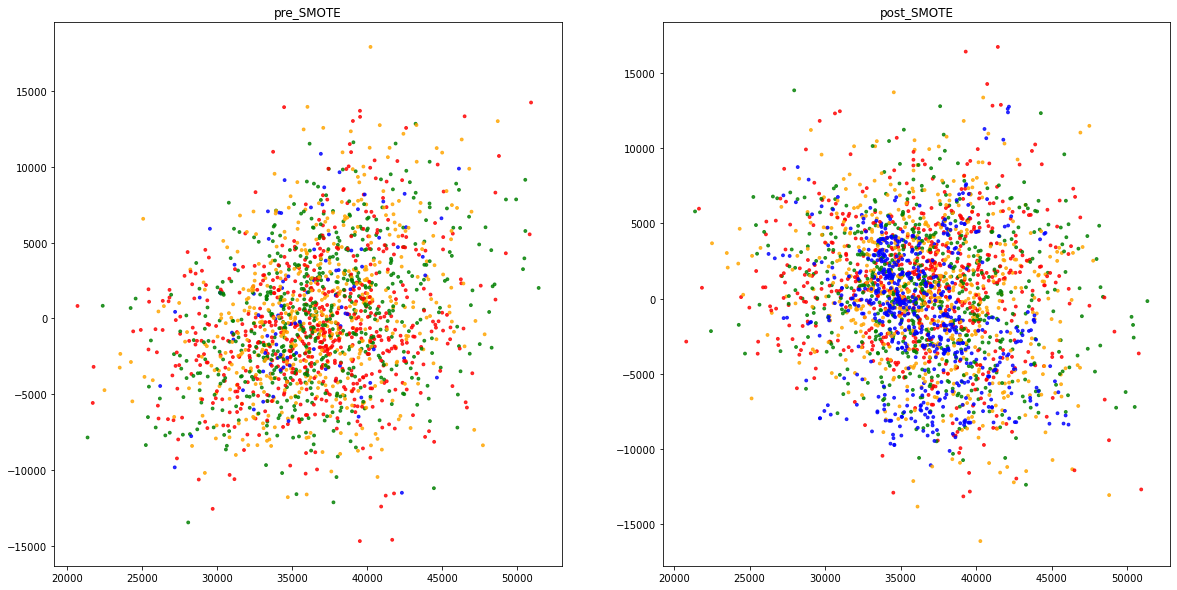

In [9]:
def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ["orange","blue","red","green"]
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            #plt.legend(handles=[orange_patch, blue_patch], prop={'size': 20})

x_train  = np.array([image.flatten() for image in x ])
x_trainS  = np.array([image.flatten() for image in xS ])

del x,xS

fig = plt.figure(figsize=(20,10))
fig.add_subplot(121)
plot_LSA(x_train, y)
plt.title("pre_SMOTE")
fig.add_subplot(122)
plot_LSA(x_trainS, yS)
plt.title("post_SMOTE")

#### PCA

Although the two plots above show that the dataset (assuming its signal to be greater than noise) does not live on a *linear submanifold*, we've decided to plot its principal components below.

U.shape =  (2488, 2488)
S.shape =  (2488,)
V.shape =  (2488, 120000)
plot the first principal components
plot less relevant principal components


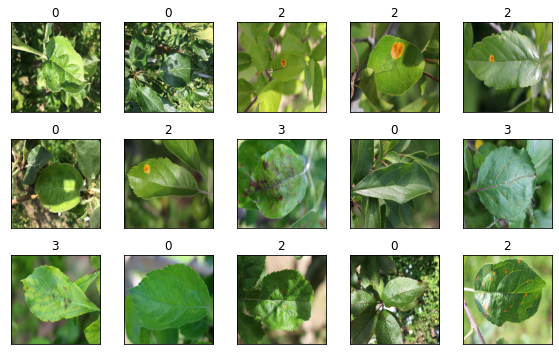

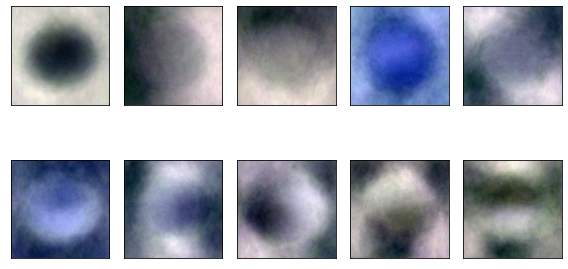

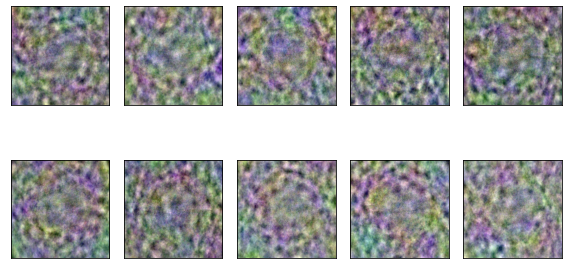

In [10]:
pca = PCA()
pca.fit(x_trainS)

U = pca.transform(x_trainS)
S = pca.explained_variance_
V = pca.components_

print ("U.shape = ", U.shape)
print ("S.shape = ",S.shape)
print ("V.shape = ", V.shape)

plt.rc("image", cmap="binary")
plt.figure(figsize=(8,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(x_train[i].reshape(200,200,3)))
    plt.title(y[i])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()


print("plot the first principal components")

plt.figure(figsize=(8,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(V[i].reshape(200,200,3)))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()


print("plot less relevant principal components")
plt.figure(figsize=(8,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(V[200+i].reshape(200,200,3)))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

Here we plot the *explained variance* as a function of the principal directions retained.

429


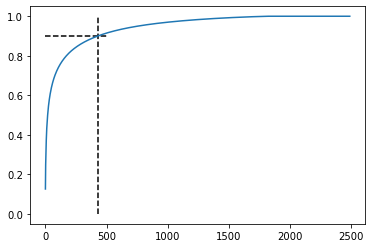

In [11]:
ev_cumsum = np.cumsum(pca.explained_variance_)/(pca.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print (ev_at90)

plt.plot(ev_cumsum)
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 500, linestyles='dashed');

### Keras Implementation

#### Callbacks 

Here we instantiate a **checkpoint callback**: a learning rate modifier which saves the best model weights both for prediction and for stocasticity evaluation.

In [12]:
# Create a directory to save outputs 
os.makedirs("../working/Saved/")

args = {
    "save_weights_only":True,
    "monitor":'val_categorical_auc',
    "mode":'max',
    "save_best_only":True,
    "verbose":0  }

checkpoint_filepaths = ["../working/Saved/drop0.hdf5","../working/Saved/drop1.hdf5","../working/Saved/drop2.hdf5","../working/Saved/drop3.hdf5","../working/Saved/drop4.hdf5"
                       ,"../working/Saved/drop5.hdf5","../working/Saved/drop6.hdf5","../working/Saved/drop7.hdf5","../working/Saved/drop8.hdf5","../working/Saved/drop9.hdf5"]

### Models

#### Pre-Trained Keras Model: **DenseNet121**

In [13]:
def get_deeper_model():
    #reg = .0005
    
    METRICS = [ 
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.AUC(name='categorical_auc',multi_label=True),
        ]
    
    model = tf.keras.Sequential([DenseNet121(input_shape=(200, 200, 3),
                                weights='imagenet',
                                include_top=False),
                                L.GlobalAveragePooling2D(),
                                L.Dense(4,activation='softmax')])
        
    model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=METRICS)
    
    print(model.summary())
    return model

#### Explicit Keras Model: **EKM**

In [14]:
def get_model(drop):
    
    METRICS = [ 
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.AUC(name='categorical_auc',multi_label=True),
        ]
    
    model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 200x 200 with 3 bytes color

        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)), #, input_shape=(150, 150, 3)
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(drop),
        tf.keras.layers.Dense(4, activation='softmax')
    ])


    model.compile(RMSprop(lr=5e-4,momentum = 0.1),loss='categorical_crossentropy', metrics = METRICS)

    # Model Summary
    print(model.summary())
    
    return model

### Model Training & Validation (80%, 20%)

The EKM is trained on 80% of train data and validated on the rest.

In [15]:
drops =[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
val_loss =[]
max_val_loss_epoch = []
val_acc = []
max_val_acc_epoch = []
val_auc = []
max_val_auc_epoch = []
histories = []
epochs_l = []
i = 0
for drop in drops:
    model = get_model(drop)
    args["filepath"] = checkpoint_filepaths[i]
    history = model.fit_generator(train_flow_80,
                steps_per_epoch = total_train_80 // batch_size, #train_size//batch_size
                epochs=80, # the model never seems to suffer from validation loss increase (even up to 100 epochs)
                validation_data=val_flow,
                validation_steps=1,
                callbacks = [ModelCheckpoint(**args)],                  # we tried early stopping and learning rate scheduling, but they proved inefficient due to the high loss swipes we had during training.
                workers=4,
                verbose = 0 )   
    val_loss.append(np.max(np.array(history.history["val_loss"])))
    val_acc.append(np.max(np.array(history.history['val_categorical_accuracy'])))
    val_auc.append(np.max(np.array(history.history['val_categorical_auc'])))
    epochs_l.append(np.argmax(np.array(history.history['val_categorical_auc'])))
    histories.append(history)
    i = i+1
    print("drop  = ",drop, "done, next...")
    
history  = histories[np.argmax(np.array(val_auc))]
drop = drops[np.argmax(np.array(val_auc))]
epochs = epochs_l[np.argmax(np.array(val_auc))]+1 #epochs = np.argmax(np.array(history.history["val_categorical_auc"]))
best_weights = checkpoint_filepaths[np.argmax(np.array(val_auc))]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

drop  =  0.3 done, next...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)         

drop  =  0.7 done, next...
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)         

best drop =  0.9 best epochs =  80 best_weights =  ../working/Saved/drop9.hdf5


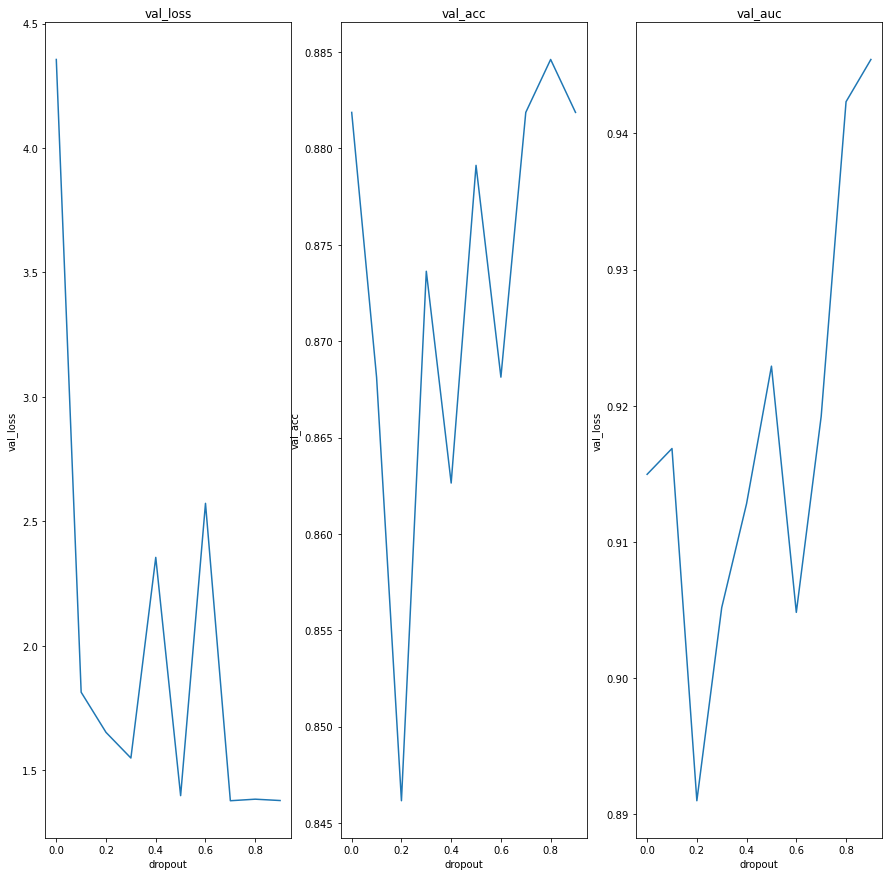

In [16]:
print("best drop = ", drop,"best epochs = ", epochs, "best_weights = ", best_weights)

fig, axs = plt.subplots(1,3, figsize = (15,15))
axs[0].set_title("val_loss")
axs[0].set_xlabel("dropout")
axs[0].set_ylabel("val_loss")
axs[0].plot(drops, val_loss)

axs[1].set_title("val_acc")
axs[1].set_xlabel("dropout")
axs[1].set_ylabel("val_acc")
axs[1].plot(drops, val_acc)

axs[2].set_title("val_auc")
axs[2].set_xlabel("dropout")
axs[2].set_ylabel("val_loss")
axs[2].plot(drops, val_auc) 

In [17]:
model_new = get_model(drop)
history_new = model_new.fit_generator(train_flow_80,
            steps_per_epoch = total_train_80 // batch_size, #train_size//batch_size
            epochs=80,           # the model never seems to suffer from validation loss increase (even up to 100 epochs)
            validation_data=val_flow,
            validation_steps=1,  # we tried early stopping and learning rate scheduling, but they proved inefficient due to the high loss swipes we had during training.
            workers=4)   

deeper_model = get_deeper_model()
deeper_history = deeper_model.fit_generator(train_flow_80,
            steps_per_epoch = total_train_80 // batch_size, #train_size//batch_size
            epochs=20,               # the model never seems to suffer from validation loss increase (even up to 100 epochs)
            validation_data=val_flow,
            validation_steps=1,      # we tried early stopping and learning rate scheduling, but they proved inefficient due to the high loss swipes we had during training.
            workers=4)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 21, 21, 64)      

Epoch 28/80
62/62 [==============================] - 2s 36ms/step - loss: 0.7565 - categorical_accuracy: 0.6886 - categorical_auc: 0.8878 - val_loss: 0.6127 - val_categorical_accuracy: 0.7610 - val_categorical_auc: 0.8732
Epoch 29/80
62/62 [==============================] - 2s 35ms/step - loss: 0.7255 - categorical_accuracy: 0.6957 - categorical_auc: 0.9011 - val_loss: 1.1394 - val_categorical_accuracy: 0.4835 - val_categorical_auc: 0.8429
Epoch 30/80
62/62 [==============================] - 2s 35ms/step - loss: 0.7224 - categorical_accuracy: 0.6968 - categorical_auc: 0.9005 - val_loss: 0.5908 - val_categorical_accuracy: 0.7555 - val_categorical_auc: 0.8828
Epoch 31/80
62/62 [==============================] - 2s 34ms/step - loss: 0.7457 - categorical_accuracy: 0.6866 - categorical_auc: 0.8914 - val_loss: 0.5586 - val_categorical_accuracy: 0.7830 - val_categorical_auc: 0.8891
Epoch 32/80
62/62 [==============================] - 2s 37ms/step - loss: 0.7080 - categorical_accuracy: 0.7079 

Epoch 65/80
62/62 [==============================] - 2s 37ms/step - loss: 0.3358 - categorical_accuracy: 0.8773 - categorical_auc: 0.9787 - val_loss: 0.5009 - val_categorical_accuracy: 0.8269 - val_categorical_auc: 0.9418
Epoch 66/80
62/62 [==============================] - 3s 41ms/step - loss: 0.3200 - categorical_accuracy: 0.8920 - categorical_auc: 0.9797 - val_loss: 0.4581 - val_categorical_accuracy: 0.8489 - val_categorical_auc: 0.9254
Epoch 67/80
62/62 [==============================] - 2s 36ms/step - loss: 0.3585 - categorical_accuracy: 0.8692 - categorical_auc: 0.9757 - val_loss: 0.3494 - val_categorical_accuracy: 0.8791 - val_categorical_auc: 0.9452
Epoch 68/80
62/62 [==============================] - 2s 37ms/step - loss: 0.3368 - categorical_accuracy: 0.8849 - categorical_auc: 0.9785 - val_loss: 0.3916 - val_categorical_accuracy: 0.8571 - val_categorical_auc: 0.9373
Epoch 69/80
62/62 [==============================] - 2s 38ms/step - loss: 0.3043 - categorical_accuracy: 0.8915 

62/62 [==============================] - 11s 184ms/step - loss: 0.1216 - categorical_accuracy: 0.9615 - categorical_auc: 0.9967 - val_loss: 0.8106 - val_categorical_accuracy: 0.7253 - val_categorical_auc: 0.8649
Epoch 18/20
62/62 [==============================] - 11s 181ms/step - loss: 0.0715 - categorical_accuracy: 0.9797 - categorical_auc: 0.9986 - val_loss: 0.2618 - val_categorical_accuracy: 0.9148 - val_categorical_auc: 0.9734
Epoch 19/20
62/62 [==============================] - 11s 181ms/step - loss: 0.0513 - categorical_accuracy: 0.9863 - categorical_auc: 0.9992 - val_loss: 0.3875 - val_categorical_accuracy: 0.8956 - val_categorical_auc: 0.9398
Epoch 20/20
62/62 [==============================] - 11s 184ms/step - loss: 0.0746 - categorical_accuracy: 0.9757 - categorical_auc: 0.9992 - val_loss: 0.3339 - val_categorical_accuracy: 0.8929 - val_categorical_auc: 0.9382


### Training Histories 

In [18]:
def plot_train_history(history):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=history.history['categorical_accuracy'], marker=dict(color="dodgerblue"),
                name="Train acc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=history.history['val_categorical_accuracy'], marker=dict(color="darkblue"),
                name="Val acc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=history.history['categorical_auc'], marker=dict(color="orange"),
                name="Train auc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=history.history['val_categorical_auc'], marker=dict(color="orangered"),
                name="Val auc"))

    fig.update_layout(title_text="", yaxis_title= "Metrics", xaxis_title="Epochs", template="plotly_white")
    fig.show()

#### EKM

In [19]:
plot_train_history(history)

#### Comparison 

In [20]:
plot_train_history(history_new)

#### DenseNet121

In [21]:
plot_train_history(deeper_history)

### Confusion Matrix

In [22]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

#### EKM

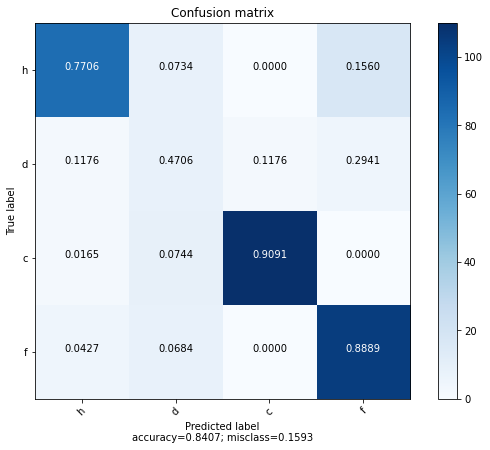

In [23]:
Y_pred = model.predict_generator(val_flow, train_size // batch_size +1) #128 +1
y_pred = np.argmax(Y_pred, axis=1)
a = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(a,["h","d","c","f"],normalize=True)

#### DenseNet121

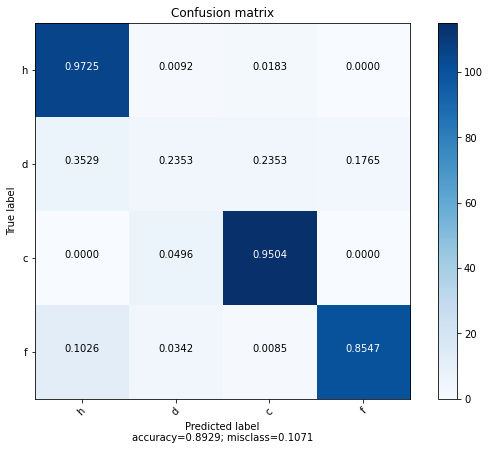

In [24]:
Y_pred = deeper_model.predict_generator(val_flow, train_size // batch_size +1) #128 +1
y_pred = np.argmax(Y_pred, axis=1)
a = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(a,["h","d","c","f"],normalize=True)

### Model Training, Prediction & Submission

In [25]:
# Save memory
del y,yS
del train_flow_80, y_train, val_flow, y_val

# Load test
test_imgs = get_augmented_test(test_dir = test_dir, test_generator = test_datagen)
print(test_imgs.shape)

#os.listdir("../working")

Found 1821 files belonging to 1 classes.
(1821, 200, 200, 3)


#### EKM 

In [26]:
EKM = get_model(drop) #0.4
EKM.fit_generator(train_flow,
            steps_per_epoch = total_train // batch_size, #train_size//batch_size
            epochs=epochs,
            #callbacks=[lr_schedule],
            workers=4)

def tensorSort(data):
    return sorted(data, key=lambda item: (int(item.partition(' ')[0])
                               if item[0].isdigit() else float('inf'), item))

y_predicted = EKM.predict(test_imgs)
submission = pd.DataFrame(y_predicted, columns = ["healthy", "multiple_diseases", "rust","scab"],)
submission.insert(0,"image_id",tensorSort(test_csv["image_id"].tolist()))
submission.to_csv("../working/submission.csv", index = False)
submission

model_loaded = get_model(drop)
model_loaded.load_weights(best_weights)


y_predicted = model_loaded.predict(test_imgs)
submission_loaded = pd.DataFrame(y_predicted, columns = ["healthy", "multiple_diseases", "rust","scab"])
submission_loaded.insert(0,"image_id",tensorSort(test_csv["image_id"].tolist()))
submission_loaded.to_csv("../working/submission_loaded.csv", index = False)
submission_loaded

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 21, 21, 64)      

77/77 [==============================] - 2s 31ms/step - loss: 0.5395 - categorical_accuracy: 0.8037 - categorical_auc: 0.9457
Epoch 45/80
77/77 [==============================] - 2s 27ms/step - loss: 0.5349 - categorical_accuracy: 0.7980 - categorical_auc: 0.9463
Epoch 46/80
77/77 [==============================] - 2s 29ms/step - loss: 0.5378 - categorical_accuracy: 0.8090 - categorical_auc: 0.9461
Epoch 47/80
77/77 [==============================] - 2s 28ms/step - loss: 0.5011 - categorical_accuracy: 0.8090 - categorical_auc: 0.9526
Epoch 48/80
77/77 [==============================] - 2s 29ms/step - loss: 0.4902 - categorical_accuracy: 0.8208 - categorical_auc: 0.9566
Epoch 49/80
77/77 [==============================] - 2s 29ms/step - loss: 0.4597 - categorical_accuracy: 0.8294 - categorical_auc: 0.9597
Epoch 50/80
77/77 [==============================] - 2s 28ms/step - loss: 0.4671 - categorical_accuracy: 0.8241 - categorical_auc: 0.9595
Epoch 51/80
77/77 [===========================

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,2.327067e-24,0.000006,0.999994,7.055329e-21
1,Test_1,3.607633e-17,0.000756,0.999244,5.059540e-15
2,Test_10,1.521838e-16,0.000003,0.999997,2.653676e-15
3,Test_100,2.092499e-02,0.076521,0.000045,9.025093e-01
4,Test_1000,5.234135e-15,0.001021,0.998979,2.407189e-13
...,...,...,...,...,...
1816,Test_995,7.277847e-09,0.957210,0.042789,1.016355e-06
1817,Test_996,1.019740e-21,0.000191,0.999809,2.707412e-18
1818,Test_997,7.021001e-05,0.588502,0.410104,1.324032e-03
1819,Test_998,2.587029e-21,0.000109,0.999891,5.391263e-18


#### DenseNet121 

In [27]:
Dense = get_deeper_model()
Dense.fit_generator(train_flow,
            steps_per_epoch = total_train // batch_size, #train_size//batch_size
            epochs=20,
            #callbacks=[lr_scheduled],
            workers=4)


y_predicted = Dense.predict(test_imgs)
submission = pd.DataFrame(y_predicted, columns = ["healthy", "multiple_diseases", "rust","scab"],)
submission.insert(0,"image_id",tensorSort(test_csv["image_id"].tolist()))
submission.to_csv("../working/deeper_submission.csv", index = False)
submission

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 6, 6, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 4100      
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________
None
Epoch 1/20
77/77 [==============================] - 14s 183ms/step - loss: 1.0395 - categorical_accuracy: 0.6209 - categorical_auc: 0.8269
Epoch 2/20
77/77 [==============================] - 13s 169ms/step - loss: 0.6637 - categorical_accuracy: 0.7451 - categorical_auc: 0.9118
Epoch 3/20
77/77 [==============================] - 13s 167ms/step - loss: 0.6137 - c

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000003,0.065739,9.342545e-01,2.658807e-06
1,Test_1,0.000287,0.047982,9.515790e-01,1.523459e-04
2,Test_10,0.000005,0.004181,9.958135e-01,7.612372e-07
3,Test_100,0.000019,0.000327,1.064542e-12,9.996538e-01
4,Test_1000,0.008387,0.540577,4.460241e-01,5.012176e-03
...,...,...,...,...,...
1816,Test_995,0.000067,0.082503,9.174161e-01,1.467845e-05
1817,Test_996,0.000089,0.044343,9.555321e-01,3.558029e-05
1818,Test_997,0.000055,0.993356,3.865455e-03,2.723359e-03
1819,Test_998,0.000010,0.012131,9.878554e-01,3.846804e-06


### Filters & Feature Maps 

Something along the lines of 

**Layer Activations.** The most straight-forward visualization technique is to show the activations of the network during the forward pass. For ReLU networks, the activations usually start out looking relatively blobby and dense, but as the training progresses the activations usually become more sparse and localized. One dangerous pitfall that can be easily noticed with this visualization is that some activation maps may be all zero for many different inputs, which can indicate dead filters, and can be a symptom of high learning rates.

Typical-looking activations on the first CONV layer (left), and the 5th CONV layer (right) of a trained AlexNet looking at a picture of a cat. Every box shows an activation map corresponding to some filter. Notice that the activations are sparse (most values are zero, in this visualization shown in black) and mostly local.


**Conv/FC Filters.** The second common strategy is to visualize the weights. These are usually most interpretable on the first CONV layer which is looking directly at the raw pixel data, but it is possible to also show the filter weights deeper in the network. The weights are useful to visualize because well-trained networks usually display nice and smooth filters without any noisy patterns. Noisy patterns can be an indicator of a network that hasn’t been trained for long enough, or possibly a very low regularization strength that may have led to overfitting.

Typical-looking filters on the first CONV layer (left), and the 2nd CONV layer (right) of a trained AlexNet. Notice that the first-layer weights are very nice and smooth, indicating nicely converged network. The color/grayscale features are clustered because the AlexNet contains two separate streams of processing, and an apparent consequence of this architecture is that one stream develops high-frequency grayscale features and the other low-frequency color features. The 2nd CONV layer weights are not as interpretable, but it is apparent that they are still smooth, well-formed, and absent of noisy patterns.

#### EKM Filters

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 21, 21, 64)      

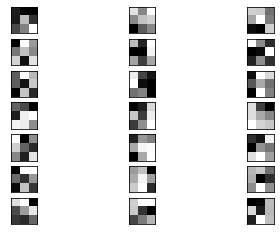

In [28]:
# Select input image
input_image = "../input/plantvillage/plantvillage_split_dataset/test_images/Test_100.jpg" 

# Load model
model = EKM

# Summarize model 
model.summary()

# Redefine model to ignore 1st hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

# Create layer dictionary
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Extract weights 
filters, biases = model.layers[1].get_weights()

# Normalize filter values for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot some of the first layers
n_filters, ix = 7, 1
for i in range(n_filters):
    f = filters[:, :, :, i]                      # get the filter
    for j in range(3):                           # plot each channel separately
        ax = pyplot.subplot(n_filters, 3, ix)    # specify subplot and turn of axis
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, j], cmap='gray')   # plot filter channel in grayscale
        ix += 1
pyplot.show()                                    

### EKM Feature Maps

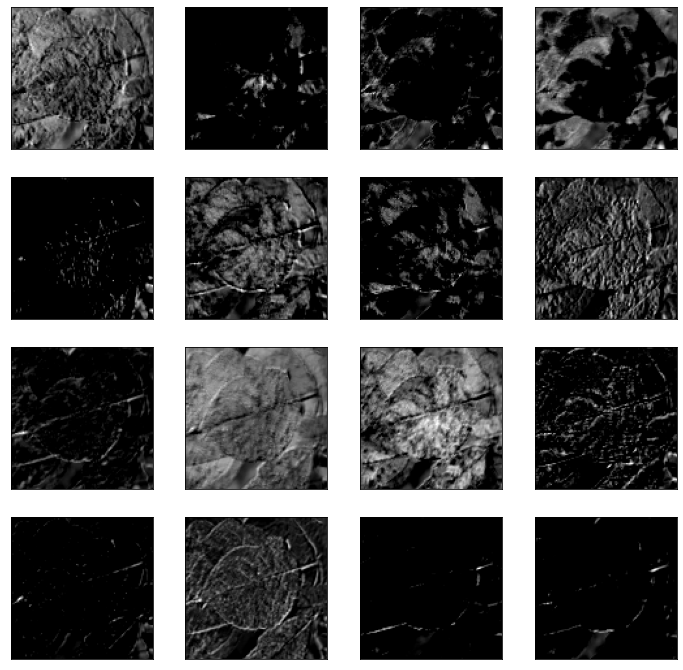

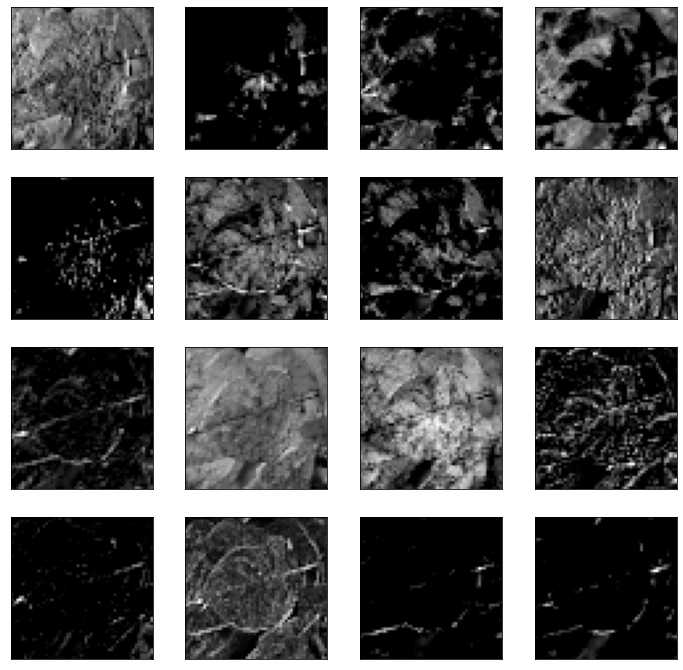

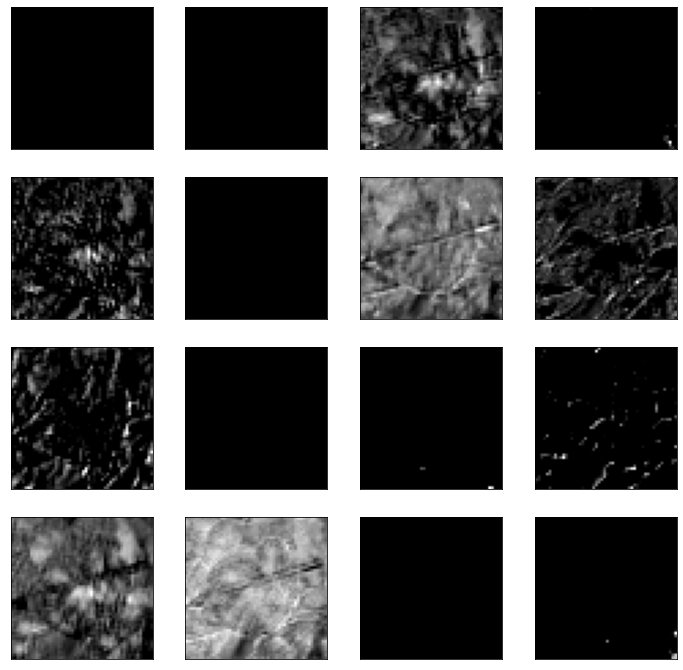

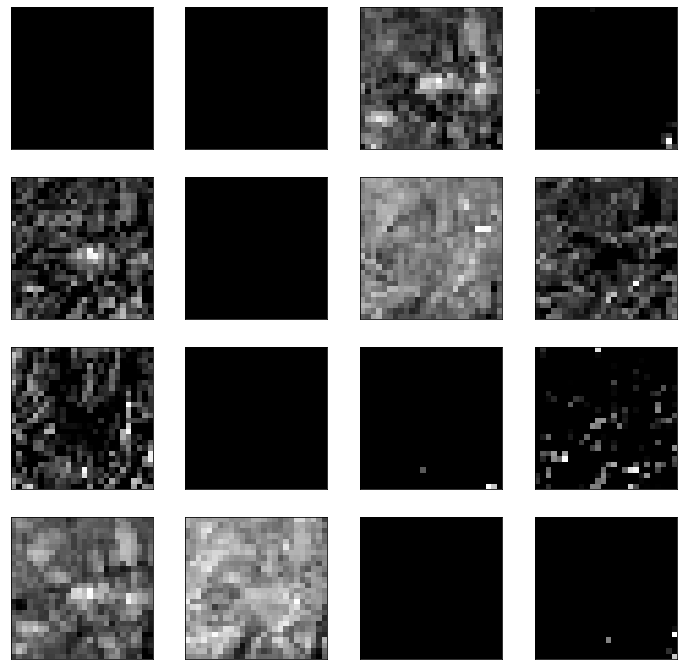

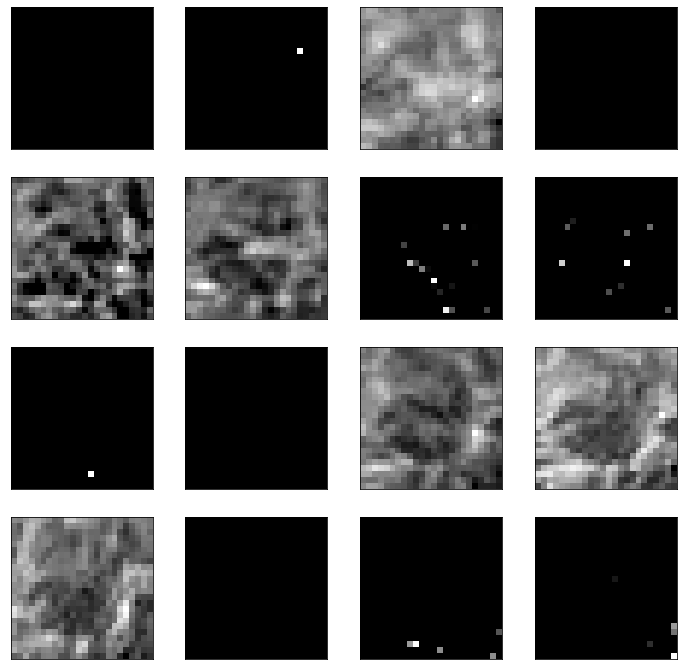

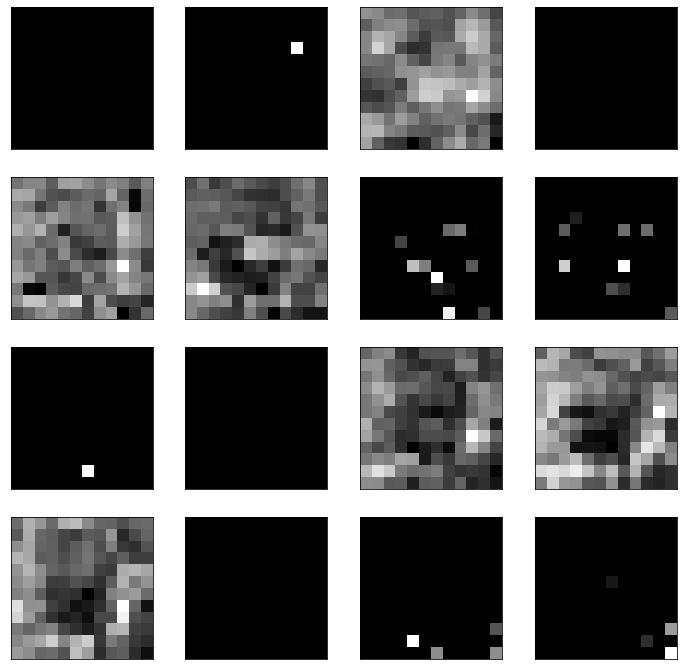

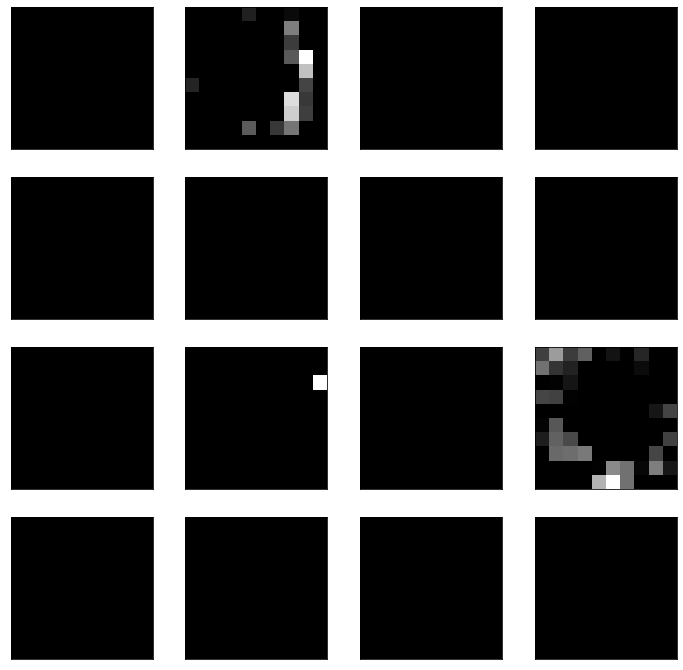

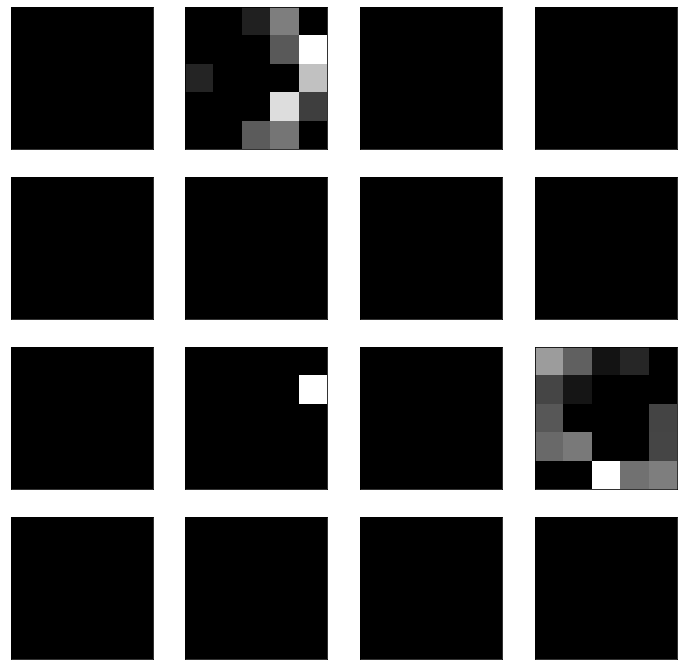

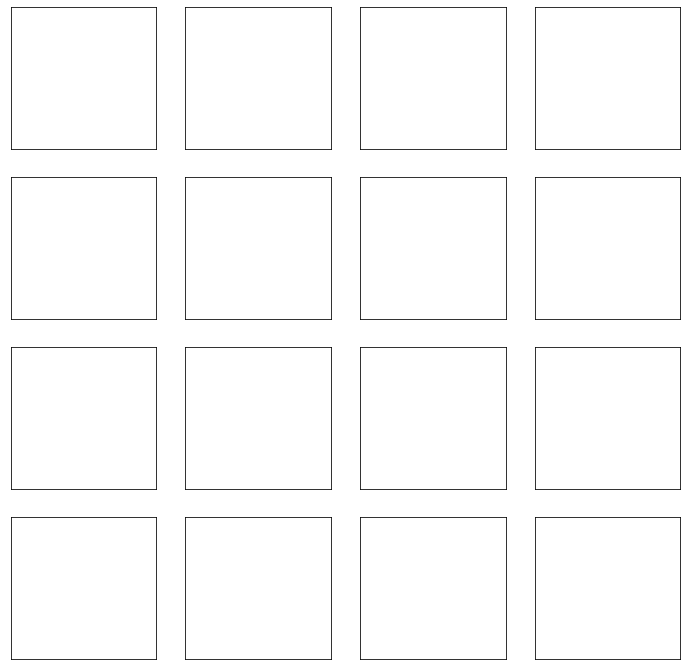

In [34]:
# Load model
model = EKM

# Redefine model to ignore 1st hidden layer
ixs = [2,3,4,5,6,7,8, 9, 10]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# Load and reshape input image
img = load_img(input_image, target_size=(224, 224))

# Convert image to array
img = img_to_array(img)

# Expand dimensions 
img = expand_dims(img, axis=0)

# Prepare the image 
img = preprocess_input(img)

# Get feature map for 1st hidden layer
feature_maps = model.predict(img)

# Plot the output from each block
square = 4

for fmap in feature_maps:
    ix = 1
    plt.figure(figsize = (12,12))
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            try:
                pyplot.imshow(fmap[0, :, :, ix-1], cmap = 'gray')
            except:
                print("", end = "\r")
            ix += 1
    pyplot.show()